In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
p = pd.read_csv(r'C:\Users\lyons\OneDrive\Desktop\IML-FALL2025---Voter-Bias\output_data\cfb\cfb_master_bias_file.csv')

In [14]:
p

,Pollster (v),Season,Week,Rank,Team (t),ap_rank,average,median,"bias1(v, t)","bias2(v, t)","bias3(v, t)"
0,adam-jude,2014,1,1,florida-state-seminoles,1.0,3.067,3.0,0.000000,-2.067000,-2.000000
1,adam-sparks,2014,1,1,florida-state-seminoles,1.0,3.067,3.0,0.000000,-2.067000,-2.000000
2,adam-zucker,2014,1,1,florida-state-seminoles,1.0,3.067,3.0,0.000000,-2.067000,-2.000000
3,bill-rabinowitz,2014,1,1,florida-state-seminoles,1.0,3.067,3.0,0.000000,-2.067000,-2.000000
4,bob-asmussen,2014,1,1,florida-state-seminoles,1.0,3.067,3.0,0.000000,-2.067000,-2.000000
...,...,...,...,...,...,...,...,...,...,...,...
255493,stephen-means,2024,5,25,nebraska-cornhuskers,26.0,21.333,22.0,-0.040000,0.171893,0.136364
255494,steven-johnson,2024,5,25,washington-state-cougars,26.0,23.923,24.0,-0.040000,0.045019,0.041667
255495,tom-murphy,2024,5,25,indiana-hoosiers,26.0,22.875,23.5,-0.040000,0.092896,0.063830
255496,trevor-hass,2024,5,25,indiana-hoosiers,26.0,22.875,23.5,-0.040000,0.092896,0.063830


In [ ]:
df = pd.read_csv(r'C:\Users\lyons\OneDrive\Desktop\IML-FALL2025---Voter-Bias\output_data\cfb\cfb_master_bias_file.csv')

In [ ]:
df

In [ ]:
df2024 = df[df.Season == 2024]
df2024_week5 = df2024[df2024.Week == 5]
df2024_week5_stephen = df2024_week5[df2024_week5['Pollster (v)'] == 'stephen-means']
df2024_week5_stephen_26 = df2024_week5_stephen[df2024_week5_stephen.ap_rank == 26]
df2024_week5_stephen_26


#looking at how these two teams ranked 26, we can see that these unranked teams vary much greater compared to the bias2 and bias3 because of how we are handling unranked teams

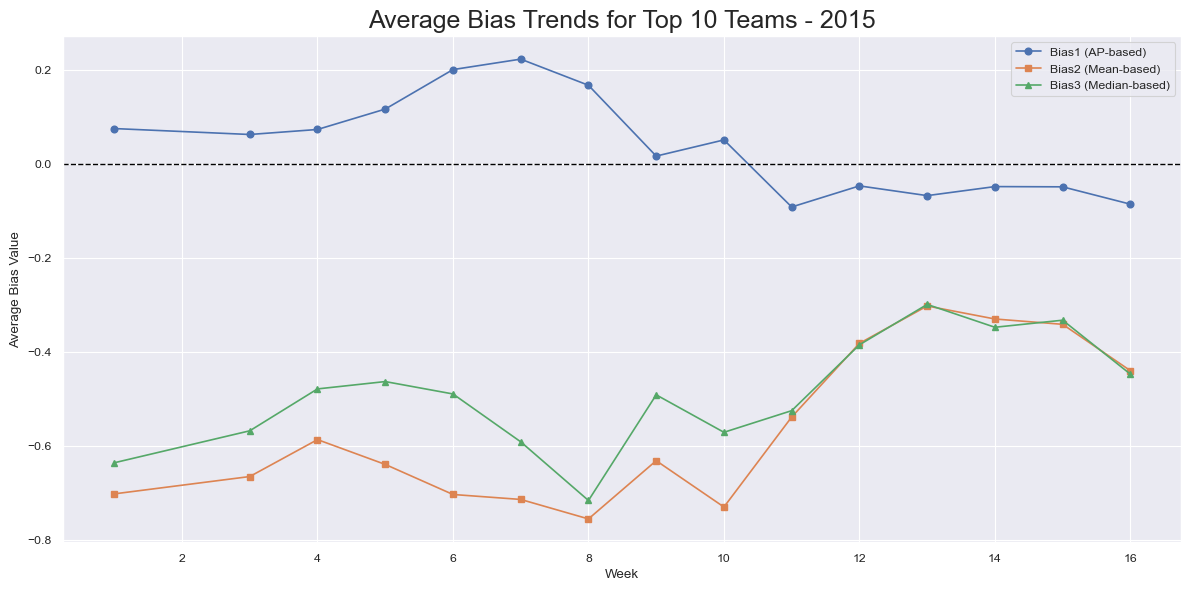

In [16]:
df_2015 = df[df["Season"] == 2015]

agg_2015 = (
    df_2015.groupby(["Season", "Week", "Team (t)", "ap_rank", "average", "median"], as_index = False)
    [["bias1(v, t)", "bias2(v, t)", "bias3(v, t)"]].mean()
)

top10_teams_2015 = (
    agg_2015[agg_2015["Week"] == 1]
    .nsmallest(10, "ap_rank")["Team (t)"]
    .tolist()
)

agg_top10_2015 = agg_2015[agg_2015["Team (t)"].isin(top10_teams_2015)]

avg_bias_top10 = (
    agg_top10_2015.groupby("Week")[["bias1(v, t)", "bias2(v, t)", "bias3(v, t)"]]
    .mean()
    .reset_index()
)

sns.set(style = "darkgrid", context = "paper")

plt.figure(figsize=(12,6))
plt.plot(avg_bias_top10["Week"], avg_bias_top10["bias1(v, t)"], marker = "o", label = "Bias1 (AP-based)")
plt.plot(avg_bias_top10["Week"], avg_bias_top10["bias2(v, t)"], marker = "s", label = "Bias2 (Mean-based)")
plt.plot(avg_bias_top10["Week"], avg_bias_top10["bias3(v, t)"], marker = "^", label = "Bias3 (Median-based)")

plt.axhline(0, color = "black", linestyle = "--", linewidth = 1)

plt.title("Average Bias Trends for Top 10 Teams - 2015", fontsize = 18)
plt.xlabel("Week")
plt.ylabel("Average Bias Value")
plt.legend()
plt.tight_layout()
plt.show()

# 1. How the Three References Differ

## <u>AP rank (points-based, long):</u>

- A team receives points if there is any pollster where they are ranked.

- If ranked by only one voter (say, 25th), they receive 1 point.

- This puts them far down the points list (say, AP rank ~60–70).

- All non-ranked teams are essentially "AP rank 26+," but their relative standing depends on one point or two.

## <u>Average rank:</u>

- Computed as the mean of the numerical rank values by those who did include the team.

- Unranked teams are typically omitted (i.e., only ranks that are actually present are averaged).

- Thus if one pollster has a team 25th and all the rest leave them out, their average rank is just 25.0.

## <u>Median rank:</u>

- Similar to average, but you take the middle value of the set of ranks in which the team is present.

- For one ballot, median = that one ballot (e.g., 25).

- For two ballots, it's between those two figures.

# 2. Why Average/Median Biases Follow Each Other

- Average and median both just report on the subset of pollsters who did actually rank the team.

- If 10 pollsters all placed a team ~15th, both average ≈ 15 and median ≈ 15.

- If 1 pollster places a team 25th, both average = 25, median = 25.

- So they're proximate by nature, and that's why bias2 and bias3 behave the same way.

# 3. Why AP Bias Seems Different

- AP rank ranks ballots indirectly through the point total.

- Teams mentioned only 1–2 times get dropped far down the running points list.
Example:

    - Team A ranked #25 by 1 pollster → 1 point → AP rank ~65.

    - But average/median rank for that team = 25.

- Hence, the gap between AP rank and average/median is huge when there is weak support within a team.

- This magnifies bias1 (when compared to AP rank), offering more variance and bigger actual deviations.